In [1]:
import sys
!{sys.executable} -m pip install dmba

In [2]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

#dmba is module that book has

no display found. Using non-interactive Agg backend


a) The data should be partitioned so that we can know if the model will be a good predictor of the outcome. The training set is used to create the regression model, and the validation set is used to test the regression model for performance.

In [4]:
bh = pd.read_csv('BostonHousing.csv')
bh.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [5]:
bh.shape

(506, 14)

In [6]:
# Reduce data frame to the top 1000 rows and select columns for regression analysis
bh = pd.read_csv('BostonHousing.csv')
#bh = bh.iloc[0:1000]

predictors = ['CRIM', 'CHAS', 'RM']
outcome = 'MEDV'

# partition data
X = pd.get_dummies(bh[predictors], drop_first=True)
y = bh[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

bh_lm = LinearRegression()
bh_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', bh_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': bh_lm.coef_})) #coefficients are the Beta values

# print performance measures
regressionSummary(train_y, bh_lm.predict(train_X))

intercept  -29.193467430606812
  Predictor  coefficient
0      CRIM    -0.240062
1      CHAS     3.266817
2        RM     8.325175

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 5.9666
            Mean Absolute Error (MAE) : 3.9668
          Mean Percentage Error (MPE) : -7.2747
Mean Absolute Percentage Error (MAPE) : 22.5927


b) MEDV = -29.193 - 0.240CRIM + 3.267CHAS + 8.325RM

In [7]:
pred = -29.19346743060681 - .240062*.1 + 3.266817*0 + 8.325175*6
pred

20.733576369393187

c) Median house price is 20.7

In [8]:
bh.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


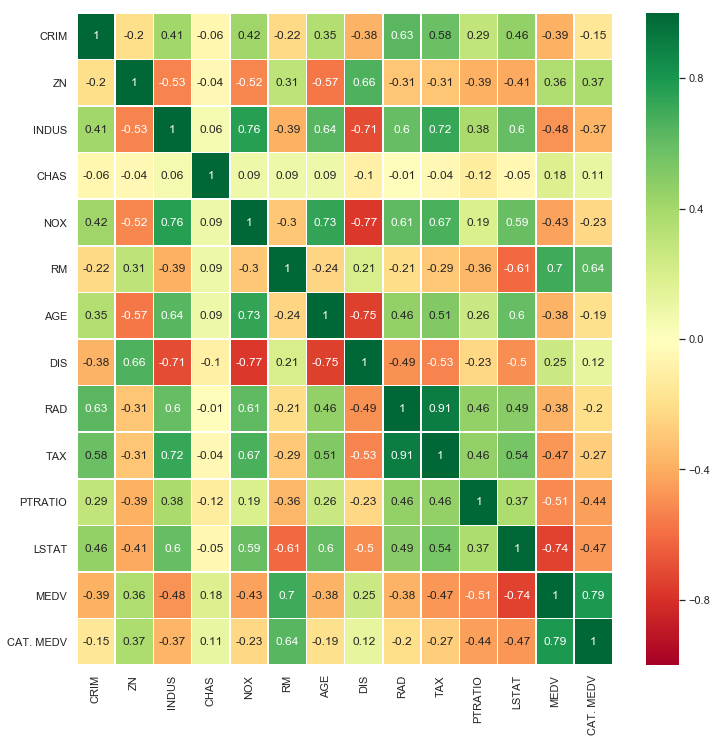

In [9]:
import seaborn as sns; sns.set()

data = bh.corr().round(2)

plt.figure(figsize=(12,12))

sns.heatmap(data, linewidths=.5, annot=True, center=0, vmin=-1, vmax=1,cmap="RdYlGn")
plt.show()

DIS & INDUS, DIS & NOX, DIS & AGE, MEDV & LSTAT, TAX & RAD are all highly correlated. DIS & INDUS could predict each other becuase larger distance from employment centers means less nonretail businesses around. DIS & NOX could predict each other because their negative correlation would imply that the farther you are from an employment center, the less the NOX concentration is. MEDV & LSTAT could predict each other because the negative correlation implies that the higher the percentage of lower status people, the less the home value is. TAX & RAD could predict each other becuase the positive correlation means that higher taxed homes are closer to radial highways.

I would remove DIS and TAX and CAT.MEDV

In [18]:
bh = bh.drop(columns=['DIS', 'TAX', 'CAT. MEDV'])
bh.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,1,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,2,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,2,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,3,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,3,18.7,5.33,36.2


In [20]:
predictors = ['CRIM', 'ZN','INDUS', 'CHAS', 'NOX','RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']
outcome = 'MEDV'

# partition data
X = pd.get_dummies(bh[predictors], drop_first=True)
y = bh[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

bh_lm = LinearRegression()
bh_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', bh_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': bh_lm.coef_})) #coefficients are the Beta values

# print performance measures
regressionSummary(train_y, bh_lm.predict(train_X))

intercept  28.339564328777943
  Predictor  coefficient
0      CRIM    -0.083121
1        ZN     0.008877
2     INDUS     0.027205
3      CHAS     2.949209
4       NOX   -13.384291
5        RM     3.735369
6       AGE     0.031359
7       RAD     0.116300
8   PTRATIO    -1.010487
9     LSTAT    -0.541666

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 4.8127
            Mean Absolute Error (MAE) : 3.3238
          Mean Percentage Error (MPE) : -3.7250
Mean Absolute Percentage Error (MAPE) : 17.4617


# backward elimination

In [27]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, RAD, PTRATIO, LSTAT
Start: score=1836.05
Step: score=1834.20, remove INDUS
Step: score=1832.45, remove ZN
Step: score=1832.45, remove None
['CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']


In [28]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.1894
       Root Mean Squared Error (RMSE) : 5.4266
            Mean Absolute Error (MAE) : 3.9073
          Mean Percentage Error (MPE) : -4.5442
Mean Absolute Percentage Error (MAPE) : 18.2024


# forward selection

In [29]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, RAD, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1834.49, add AGE
Step: score=1834.23, add RAD
Step: score=1832.45, add CRIM
Step: score=1832.45, add None
['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'AGE', 'RAD', 'CRIM']


In [30]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.1894
       Root Mean Squared Error (RMSE) : 5.4266
            Mean Absolute Error (MAE) : 3.9073
          Mean Percentage Error (MPE) : -4.5442
Mean Absolute Percentage Error (MAPE) : 18.2024


# stepwise selection

In [31]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, RAD, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1834.49, add AGE
Step: score=1834.23, add RAD
Step: score=1832.45, add CRIM
Step: score=1832.45, unchanged None
['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'AGE', 'RAD', 'CRIM']


In [32]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.1894
       Root Mean Squared Error (RMSE) : 5.4266
            Mean Absolute Error (MAE) : 3.9073
          Mean Percentage Error (MPE) : -4.5442
Mean Absolute Percentage Error (MAPE) : 18.2024


Backward, forward, and stepwise all create almost identical regression models with the same RSME, MAPE, and mean error, so they are all good models. None is apparently better than any of the others.